In [4]:
#Importing model
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn as sk
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv(r"C:\Users\gokul\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.shape

(1470, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
for column in df.columns:
    print ('unique value of column',column, df[column].nunique())

unique value of column Age 43
unique value of column Attrition 2
unique value of column BusinessTravel 3
unique value of column DailyRate 886
unique value of column Department 3
unique value of column DistanceFromHome 29
unique value of column Education 5
unique value of column EducationField 6
unique value of column EmployeeCount 1
unique value of column EmployeeNumber 1470
unique value of column EnvironmentSatisfaction 4
unique value of column Gender 2
unique value of column HourlyRate 71
unique value of column JobInvolvement 4
unique value of column JobLevel 5
unique value of column JobRole 9
unique value of column JobSatisfaction 4
unique value of column MaritalStatus 3
unique value of column MonthlyIncome 1349
unique value of column MonthlyRate 1427
unique value of column NumCompaniesWorked 10
unique value of column Over18 1
unique value of column OverTime 2
unique value of column PercentSalaryHike 15
unique value of column PerformanceRating 2
unique value of column RelationshipSa

In [10]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
data = df

In [13]:
data_dummies=pd.get_dummies(data)


#The pd.get_dummies() function in pandas is used to convert categorical variables (columns with non-numeric values, such as strings or categories) into dummy/indicator variables.
#This process is often referred to as one-hot encoding.
#It makes the data suitable for use in machine learning models, which generally require numerical input.

In [14]:
data_dummies

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,False,False,False,False,False,True,False,True,True,False
1466,39,613,6,1,1,2062,4,42,2,3,...,False,False,False,False,False,True,False,True,True,False
1467,27,155,4,3,1,2064,2,87,4,2,...,False,False,False,False,False,True,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,...,False,False,True,False,False,True,False,True,True,False


In [15]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeCount                      1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [16]:
X =  data_dummies.drop(columns=['Attrition_Yes', 'Attrition_No'])

In [17]:
y = data_dummies[['Attrition_Yes']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [19]:
print(X.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [20]:
print(y.columns)

Index(['Attrition_Yes'], dtype='object')


In [21]:
print(y_train.value_counts())

Attrition_Yes
False            988
True             188
Name: count, dtype: int64


In [22]:
dt = tree.DecisionTreeClassifier(max_depth= 3)

#pruning" refers to limiting the depth of the decision tree during its construction. 
#Specifically, it is setting a maximum depth for the tree through the max_depth parameter.

In [23]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
accuracy_1 = dt.score(X_train, y_train)
print(f'Accuracy of decision tree for train data: {accuracy_1:.2f}')

Accuracy of decision tree for train data: 0.86


In [25]:
accuracy = dt.score(X_test, y_test)
print(f'Accuracy of decision tree for test data: {accuracy:.2f}')

Accuracy of decision tree for test data: 0.83


In [26]:
y_test_pred = dt.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91       245
        True       0.50      0.02      0.04        49

    accuracy                           0.83       294
   macro avg       0.67      0.51      0.47       294
weighted avg       0.78      0.83      0.76       294



In [29]:
#The classification_report() compares y_test (true values) and y_test_pred (predicted values) to compute the following performance metrics for each class:
'''
For Class 0:

Precision: 0.84: Out of all the instances predicted as "0", 84% were actually "0".
Recall: 1.00: Out of all the actual "0" instances, 100% were correctly identified.
F1-Score: 0.91: A balanced measure of precision and recall.
Support: 245: There are 245 true instances of class "0" in the test set.

For Class 1:

Precision: 0.50: Out of all the instances predicted as "1", 91% were actually "1".
Recall: 0.02: Out of all the actual "1" instances, 85% were correctly identified.
F1-Score: 0.04: A balanced measure for class "1".
Support: 49: There are 49 true instances of class "1" in the test set.
Overall:

Accuracy: 0.89: The overall accuracy of the model is 89%, meaning 89% of the predictions were correct.
Macro avg: This is the average of precision, recall, and F1-score calculated independently for each class.
Weighted avg: This is the average of precision, recall, and F1-score, weighted by the number of instances of each class (support).
Summary:
Accuracy is calculated as the proportion of correct predictions (both true positives and true negatives) out of all predictions.
Classification report provides a more detailed breakdown of performance, including precision, recall, and F1-score for each class, in addition to the overall accuracy. It helps you evaluate the model's performance in a more nuanced way, especially when dealing with imbalanced datasets'''

'\nFor Class 0:\n\nPrecision: 0.84: Out of all the instances predicted as "0", 84% were actually "0".\nRecall: 1.00: Out of all the actual "0" instances, 100% were correctly identified.\nF1-Score: 0.91: A balanced measure of precision and recall.\nSupport: 245: There are 245 true instances of class "0" in the test set.\n\nFor Class 1:\n\nPrecision: 0.50: Out of all the instances predicted as "1", 91% were actually "1".\nRecall: 0.02: Out of all the actual "1" instances, 85% were correctly identified.\nF1-Score: 0.04: A balanced measure for class "1".\nSupport: 49: There are 49 true instances of class "1" in the test set.\nOverall:\n\nAccuracy: 0.89: The overall accuracy of the model is 89%, meaning 89% of the predictions were correct.\nMacro avg: This is the average of precision, recall, and F1-score calculated independently for each class.\nWeighted avg: This is the average of precision, recall, and F1-score, weighted by the number of instances of each class (support).\nSummary:\nAccu

In [30]:
#Adding Hyper parameters

In [31]:
dt_1 = tree.DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    criterion='gini'
)

In [32]:
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [33]:
accuracy_2 = dt_1.score(X_train, y_train)
print(f'Accuracy of decision tree for train data: {accuracy_2:.2f}')

Accuracy of decision tree for train data: 0.86


In [34]:
accuracy_3 = dt_1.score(X_test, y_test)
print(f'Accuracy of decision tree for test data: {accuracy_3:.2f}')

Accuracy of decision tree for test data: 0.83


In [35]:
y_test_pred_1 = dt_1.predict(X_test)

In [36]:
print(classification_report(y_test, y_test_pred_1))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91       245
        True       0.50      0.02      0.04        49

    accuracy                           0.83       294
   macro avg       0.67      0.51      0.47       294
weighted avg       0.78      0.83      0.76       294



In [37]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

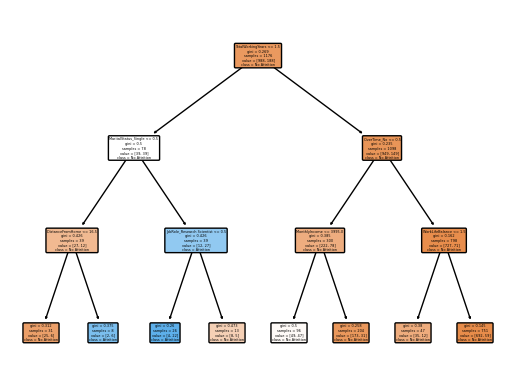

In [38]:
plot_tree(dt_1, filled = True, feature_names = X.columns, class_names=['No Attrition', 'Attrition'], rounded=True)
plt.show()

In [39]:
dt_1.predict(X_test.iloc[0:2])

array([False, False])

In [40]:
y_test.iloc[0:2]

,Attrition_Yes
442,False
1091,False


In [41]:
dt_1.predict([X_test.iloc[0]])

C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_test_pred_log = log_reg.predict(X_test)

In [53]:
log_accuracy_1 = log_reg.score(X_train,y_train)


In [57]:
print(f'The Accuracy of X: {log_accuracy_1:.2f}')

The Accuracy of X: 0.84


In [56]:
log_accuracy_2 = log_reg.score(X_test, y_test)

In [59]:
print(f'The Accuracy of y:{log_accuracy_2:.2f}')

The Accuracy of y:0.83


In [61]:
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

       False       0.83      1.00      0.91       245
        True       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adding hyperparameters

In [63]:
log_reg_1 = LogisticRegression(C=1000, max_iter= 10000)

In [64]:
log_reg_1.fit(X_train,y_train)

C:\Users\gokul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000, max_iter=10000)

In [66]:
log_accuracy_3 = log_reg_1.score(X_train,y_train)
print(f'Training model accuracy:{log_accuracy_3:.2f}')

Training model accuracy:0.89


In [68]:
log_accuracy_4 = log_reg_1.score(X_test, y_test)
print(f'Test model Accuracy:{log_accuracy_4:.2f}')

Test model Accuracy:0.89


In [69]:
y_test_pred_log2 = log_reg_1.predict(X_test)

In [70]:
print(classification_report(y_test, y_test_pred_log2))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94       245
        True       0.81      0.45      0.58        49

    accuracy                           0.89       294
   macro avg       0.86      0.71      0.76       294
weighted avg       0.88      0.89      0.88       294

